In [ ]:
# ! pip install tensorflow_decision_forests

    tensorflow_decision_forests (TFDF) is a library that allows you to train tree-based models (like Random Forest, Gradient Boosted Trees, CART) inside the TensorFlow ecosystem.

    It is NOT deep learning.
    It is classical machine learning integrated with TensorFlow.



In [ ]:
import tensorflow_decision_forests as tfdf
print(tfdf.__version__)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
train = pd.read_csv('kaggle_house-train.csv')
test = pd.read_csv('kaggle-house-test.csv')
sample = pd.read_csv('sample_submission.csv')

pd.set_option('display.max_columns', None)

## row

In [73]:
df = train.copy()
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Duplicated r0w and columns

In [75]:
df.duplicated().sum()

np.int64(0)

In [76]:
df.duplicated().T.sum()

np.int64(0)

## Null check

In [77]:
missing = df.isnull().mean()
missing[missing > 0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [78]:
def missing_report(df):
    return (
        df.isnull()
          .mean()
          .mul(100) ## 👉 ratio → percentage
          .round(2)
          .sort_values(ascending=False)
          .to_frame("Missing %") ## 👉 Series → DataFrame
    )

missing_report(df)

,Missing %
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
...,...
MoSold,0.00
YrSold,0.00
SaleType,0.00
SaleCondition,0.00


### numerical_features and categorical_features in a list

In [79]:
numerical_features = df.select_dtypes(include=["int64","float64"]).columns
categorical_features = df.select_dtypes(include=["object","category"]).columns

In [80]:
print("Numerical:", numerical_features)


Numerical: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [81]:
def split_features(df, cat_unique_threshold=20):
    num_cols = df.select_dtypes(include=["number"]).columns.tolist()
    ## numeric (continuous)
    cat_cols = df.select_dtypes(include=["object","category","bool"]).columns.tolist()

    # detect numeric columns that are actually categorical
    for col in num_cols.copy():
        if df[col].nunique() <= cat_unique_threshold:
            cat_cols.append(col)
            num_cols.remove(col)

    return num_cols, cat_cols


numerical_features, categorical_features = split_features(df)

In [82]:
len(categorical_features)


59

### Univariate analysis on SalePrice.

- Calculate mean, median, skewness, and kurtosis.

- Task: Plot a histogram and a Q-Q plot. Does it follow a normal distribution? If not, apply a log
transformation.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import statsmodels.api as sm

In [86]:
print("SalePrice mean() :",df['SalePrice'].mean())
print("SalePrice median() :",df['SalePrice'].median())
print("SalePrice skew() :",df['SalePrice'].skew())

SalePrice mean() : 180921.19589041095
SalePrice median() : 163000.0
SalePrice skew() : 1.8828757597682129


In [89]:
mean_val = df['SalePrice'].mean()
median_val = df['SalePrice'].median()
skew_val = skew(df['SalePrice'])
kurt_val = kurtosis(df['SalePrice'])

print(f"{'SalePrice'} stats:")
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Skewness: {skew_val}")
print(f"Kurtosis: {kurt_val}")

SalePrice stats:
Mean: 180921.19589041095
Median: 163000.0
Skewness: 1.880940746034036
Kurtosis: 6.509812011089439


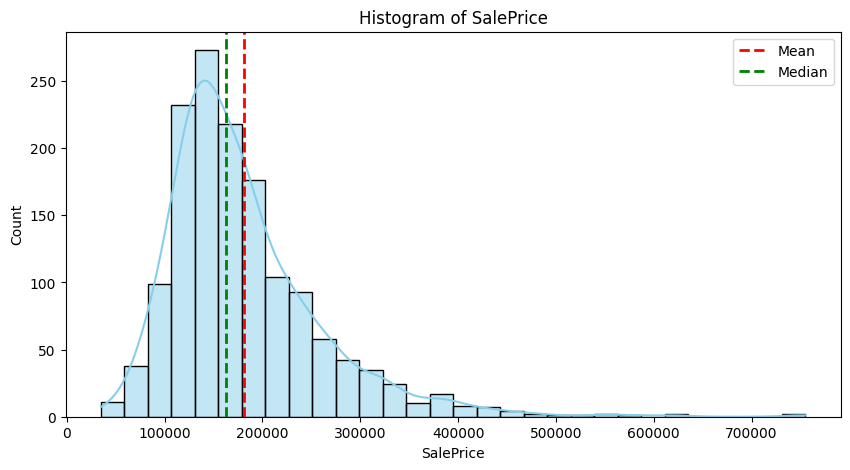

In [90]:
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='skyblue')
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title(f'Histogram of {'SalePrice'}')
plt.legend()
plt.show()

<Figure size 600x600 with 0 Axes>

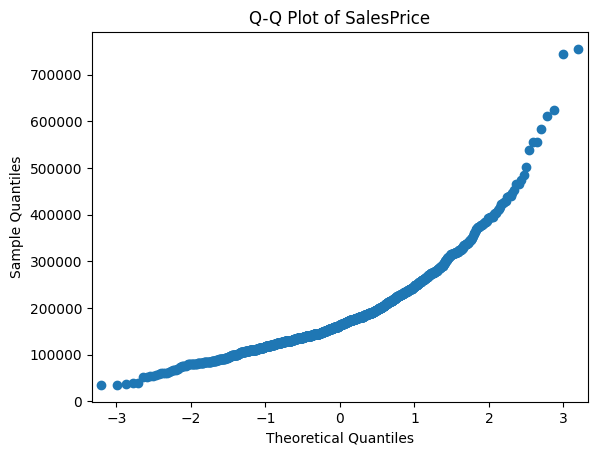

In [91]:
plt.figure(figsize=(6,6))
sm.qqplot(df['SalePrice'],)
plt.title(f'Q-Q Plot of {'SalesPrice'}')
plt.show()

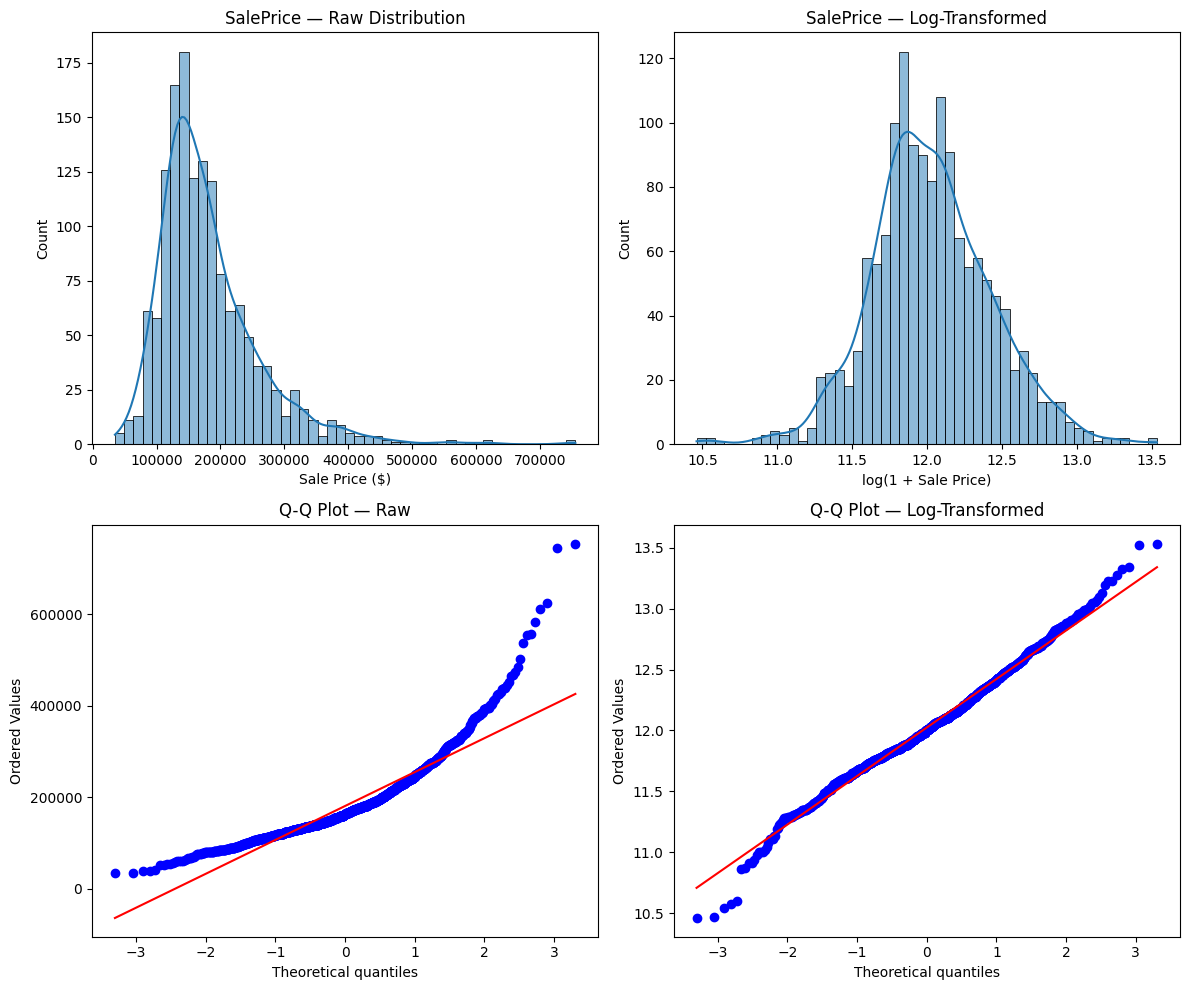

In [93]:
from scipy import stats 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Top row: Histograms with KDE
sns.histplot(train['SalePrice'], kde=True, bins=50, ax=axes[0, 0])
axes[0, 0].set_title('SalePrice — Raw Distribution')
axes[0, 0].set_xlabel('Sale Price ($)')

sns.histplot(np.log1p(train['SalePrice']), kde=True, bins=50, ax=axes[0, 1])
axes[0, 1].set_title('SalePrice — Log-Transformed')
axes[0, 1].set_xlabel('log(1 + Sale Price)')

# Bottom row: Q-Q plots
stats.probplot(train['SalePrice'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot — Raw')

stats.probplot(np.log1p(train['SalePrice']), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot — Log-Transformed')

plt.tight_layout()
plt.show()

In [96]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])

mean_val_log = df['SalePrice_log'].mean()
median_val_log = df['SalePrice_log'].median()
skew_val_log = skew(df['SalePrice_log'])
kurt_val_log = kurtosis(df['SalePrice_log'])

print(f"{'SalePrice_log'} stats:")
print(f"Mean: {mean_val_log}")
print(f"Median: {median_val_log}")
print(f"Skewness: {skew_val_log}")
print(f"Kurtosis: {kurt_val_log}")

SalePrice_log stats:
Mean: 12.024057394918406
Median: 12.001511614739405
Skewness: 0.12122191311528363
Kurtosis: 0.8026427107468055


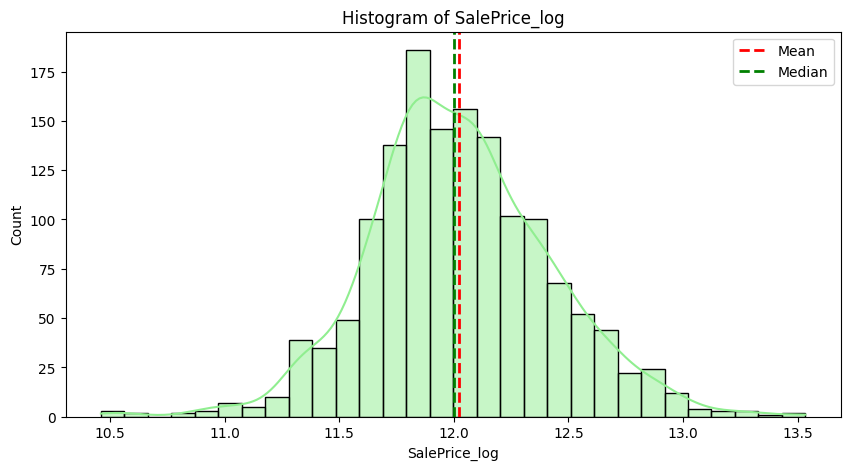

In [97]:

plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice_log'], kde=True, bins=30, color='lightgreen')
plt.axvline(mean_val_log, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_val_log, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title(f'Histogram of {'SalePrice_log'}')
plt.legend()
plt.show()

## outlier

<Axes: ylabel='SalePrice'>

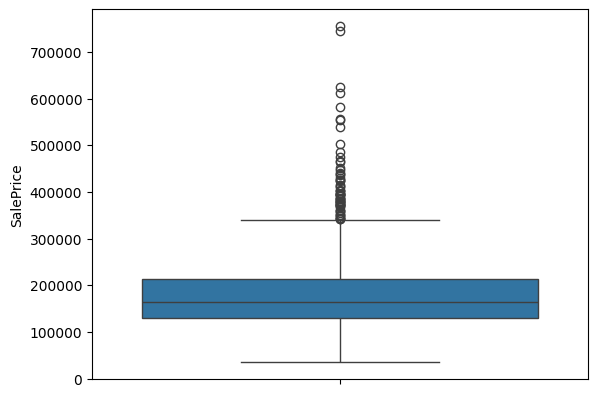

In [98]:
sns.boxplot(df['SalePrice'])

### IQR methold

    Lower bound = Q1−1.5×IQR

    Upper bound = Q3+1.5×IQR

In [99]:
q1,q3 = df['SalePrice'].quantile([0.25,0.75])

iqr = q3 - q1
print("IQR:",iqr)

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(f"Lower bond {lower} & Upper bond {upper}")

IQR: 84025.0
Lower bond 3937.5 & Upper bond 340037.5


In [100]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Column: {col}")
    print(f"Lower bound: {lower}, Upper bound: {upper}")
    print(f"Number of outliers: {len(outliers)}")
    return outliers

detect_outliers(df, 'SalePrice')

Column: SalePrice
Lower bound: 3937.5, Upper bound: 340037.5
Number of outliers: 61


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000,12.751303
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,NaN,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000,12.861001
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1410,1410,GasA,Ex,Y,SBrkr,1426,1519,0,2945,0,0,3,1,3,1,Gd,10,Typ,1,Gd,BuiltIn,2006.0,Fin,3,641,TA,TA,Y,192,0,37,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780,12.991756
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,220.0,Gd,TA,PConc,Ex,TA,Av,GLQ,984,Unf,0,280,1264,GasA,Ex,Y,SBrkr,1282,1414,0,2696,1,0,2,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2007.0,Fin,3,792,TA,TA,Y,120,184,0,0,168,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970,12.858322
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,436.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1400,Unf,0,310,1710,GasA,Ex,Y,SBrkr,1710,0,0,1710,1,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,866,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402,12.827732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,8,9,1935,1997,Gable,CompShg,Stucco,Stucco,BrkFace,632.0,TA,Gd,CBlock,TA,TA,Mn,Rec,192,Unf,0,536,728,GasA,Ex,Y,SBrkr,1968,1479,0,3447,0,0,3,1,4,1,Gd,11,Typ,2,Gd,BuiltIn,1982.0,Unf,3,1014,TA,TA,Y,314,12,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000,12.850557
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,5,1995,1996,Hip,CompShg,VinylSd,VinylSd,BrkFace,579.0,Gd,TA,PConc,Gd,TA,Av,GLQ,816,Unf,0,1217,2033,GasA,Ex,Y,SBrkr,2053,1185,0,3238,1,0,2,1,4,1,Gd,9,Typ,1,Ex,Attchd,1996.0,Fin,3,666,TA,TA,Y,283,86,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000,12.923915
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282,Unf,0,1351,2633,GasA,Ex,Y,SBrkr,2633,0,0,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500,13.053015
1388,1389,20,RL,42.0,14892,Pave,

In [101]:
def detect_outliers_all(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    outlier_summary = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        
        outlier_summary[col] = len(outliers)
        
        print(f"\nColumn: {col}")
        print(f"Lower: {lower:.2f}, Upper: {upper:.2f}")
        print(f"Outliers: {len(outliers)}")
    
    return outlier_summary

detect_outliers_all(df)


Column: Id
Lower: -728.50, Upper: 2189.50
Outliers: 0

Column: MSSubClass
Lower: -55.00, Upper: 145.00
Outliers: 103

Column: LotFrontage
Lower: 27.50, Upper: 111.50
Outliers: 88

Column: LotArea
Lower: 1481.50, Upper: 17673.50
Outliers: 69

Column: OverallQual
Lower: 2.00, Upper: 10.00
Outliers: 2

Column: OverallCond
Lower: 3.50, Upper: 7.50
Outliers: 125

Column: YearBuilt
Lower: 1885.00, Upper: 2069.00
Outliers: 7

Column: YearRemodAdd
Lower: 1911.50, Upper: 2059.50
Outliers: 0

Column: MasVnrArea
Lower: -249.00, Upper: 415.00
Outliers: 96

Column: BsmtFinSF1
Lower: -1068.38, Upper: 1780.62
Outliers: 7

Column: BsmtFinSF2
Lower: 0.00, Upper: 0.00
Outliers: 167

Column: BsmtUnfSF
Lower: -654.50, Upper: 1685.50
Outliers: 29

Column: TotalBsmtSF
Lower: 42.00, Upper: 2052.00
Outliers: 61

Column: 1stFlrSF
Lower: 118.12, Upper: 2155.12
Outliers: 20

Column: 2ndFlrSF
Lower: -1092.00, Upper: 1820.00
Outliers: 2

Column: LowQualFinSF
Lower: 0.00, Upper: 0.00
Outliers: 26

Column: GrLivAre

{'Id': 0,
 'MSSubClass': 103,
 'LotFrontage': 88,
 'LotArea': 69,
 'OverallQual': 2,
 'OverallCond': 125,
 'YearBuilt': 7,
 'YearRemodAdd': 0,
 'MasVnrArea': 96,
 'BsmtFinSF1': 7,
 'BsmtFinSF2': 167,
 'BsmtUnfSF': 29,
 'TotalBsmtSF': 61,
 '1stFlrSF': 20,
 '2ndFlrSF': 2,
 'LowQualFinSF': 26,
 'GrLivArea': 31,
 'BsmtFullBath': 1,
 'BsmtHalfBath': 82,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 35,
 'KitchenAbvGr': 68,
 'TotRmsAbvGrd': 30,
 'Fireplaces': 5,
 'GarageYrBlt': 0,
 'GarageCars': 5,
 'GarageArea': 21,
 'WoodDeckSF': 32,
 'OpenPorchSF': 77,
 'EnclosedPorch': 208,
 '3SsnPorch': 24,
 'ScreenPorch': 116,
 'PoolArea': 7,
 'MiscVal': 52,
 'MoSold': 0,
 'YrSold': 0,
 'SalePrice': 61,
 'SalePrice_log': 28}

<Axes: ylabel='SalePrice'>

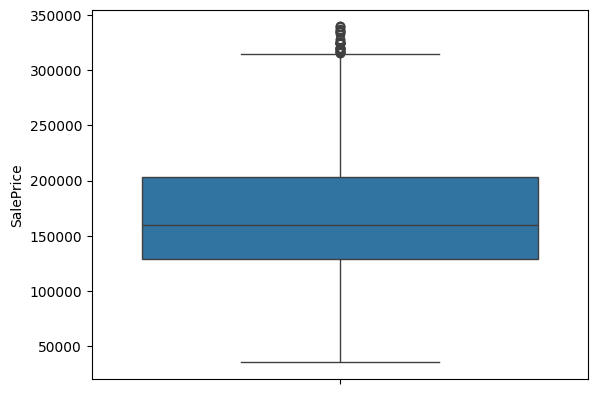

In [102]:
df = df[(df['SalePrice'] >= lower) & (df['SalePrice'] <= upper)]
sns.boxplot(df.SalePrice)

## Multivariate Analysis & Visualization

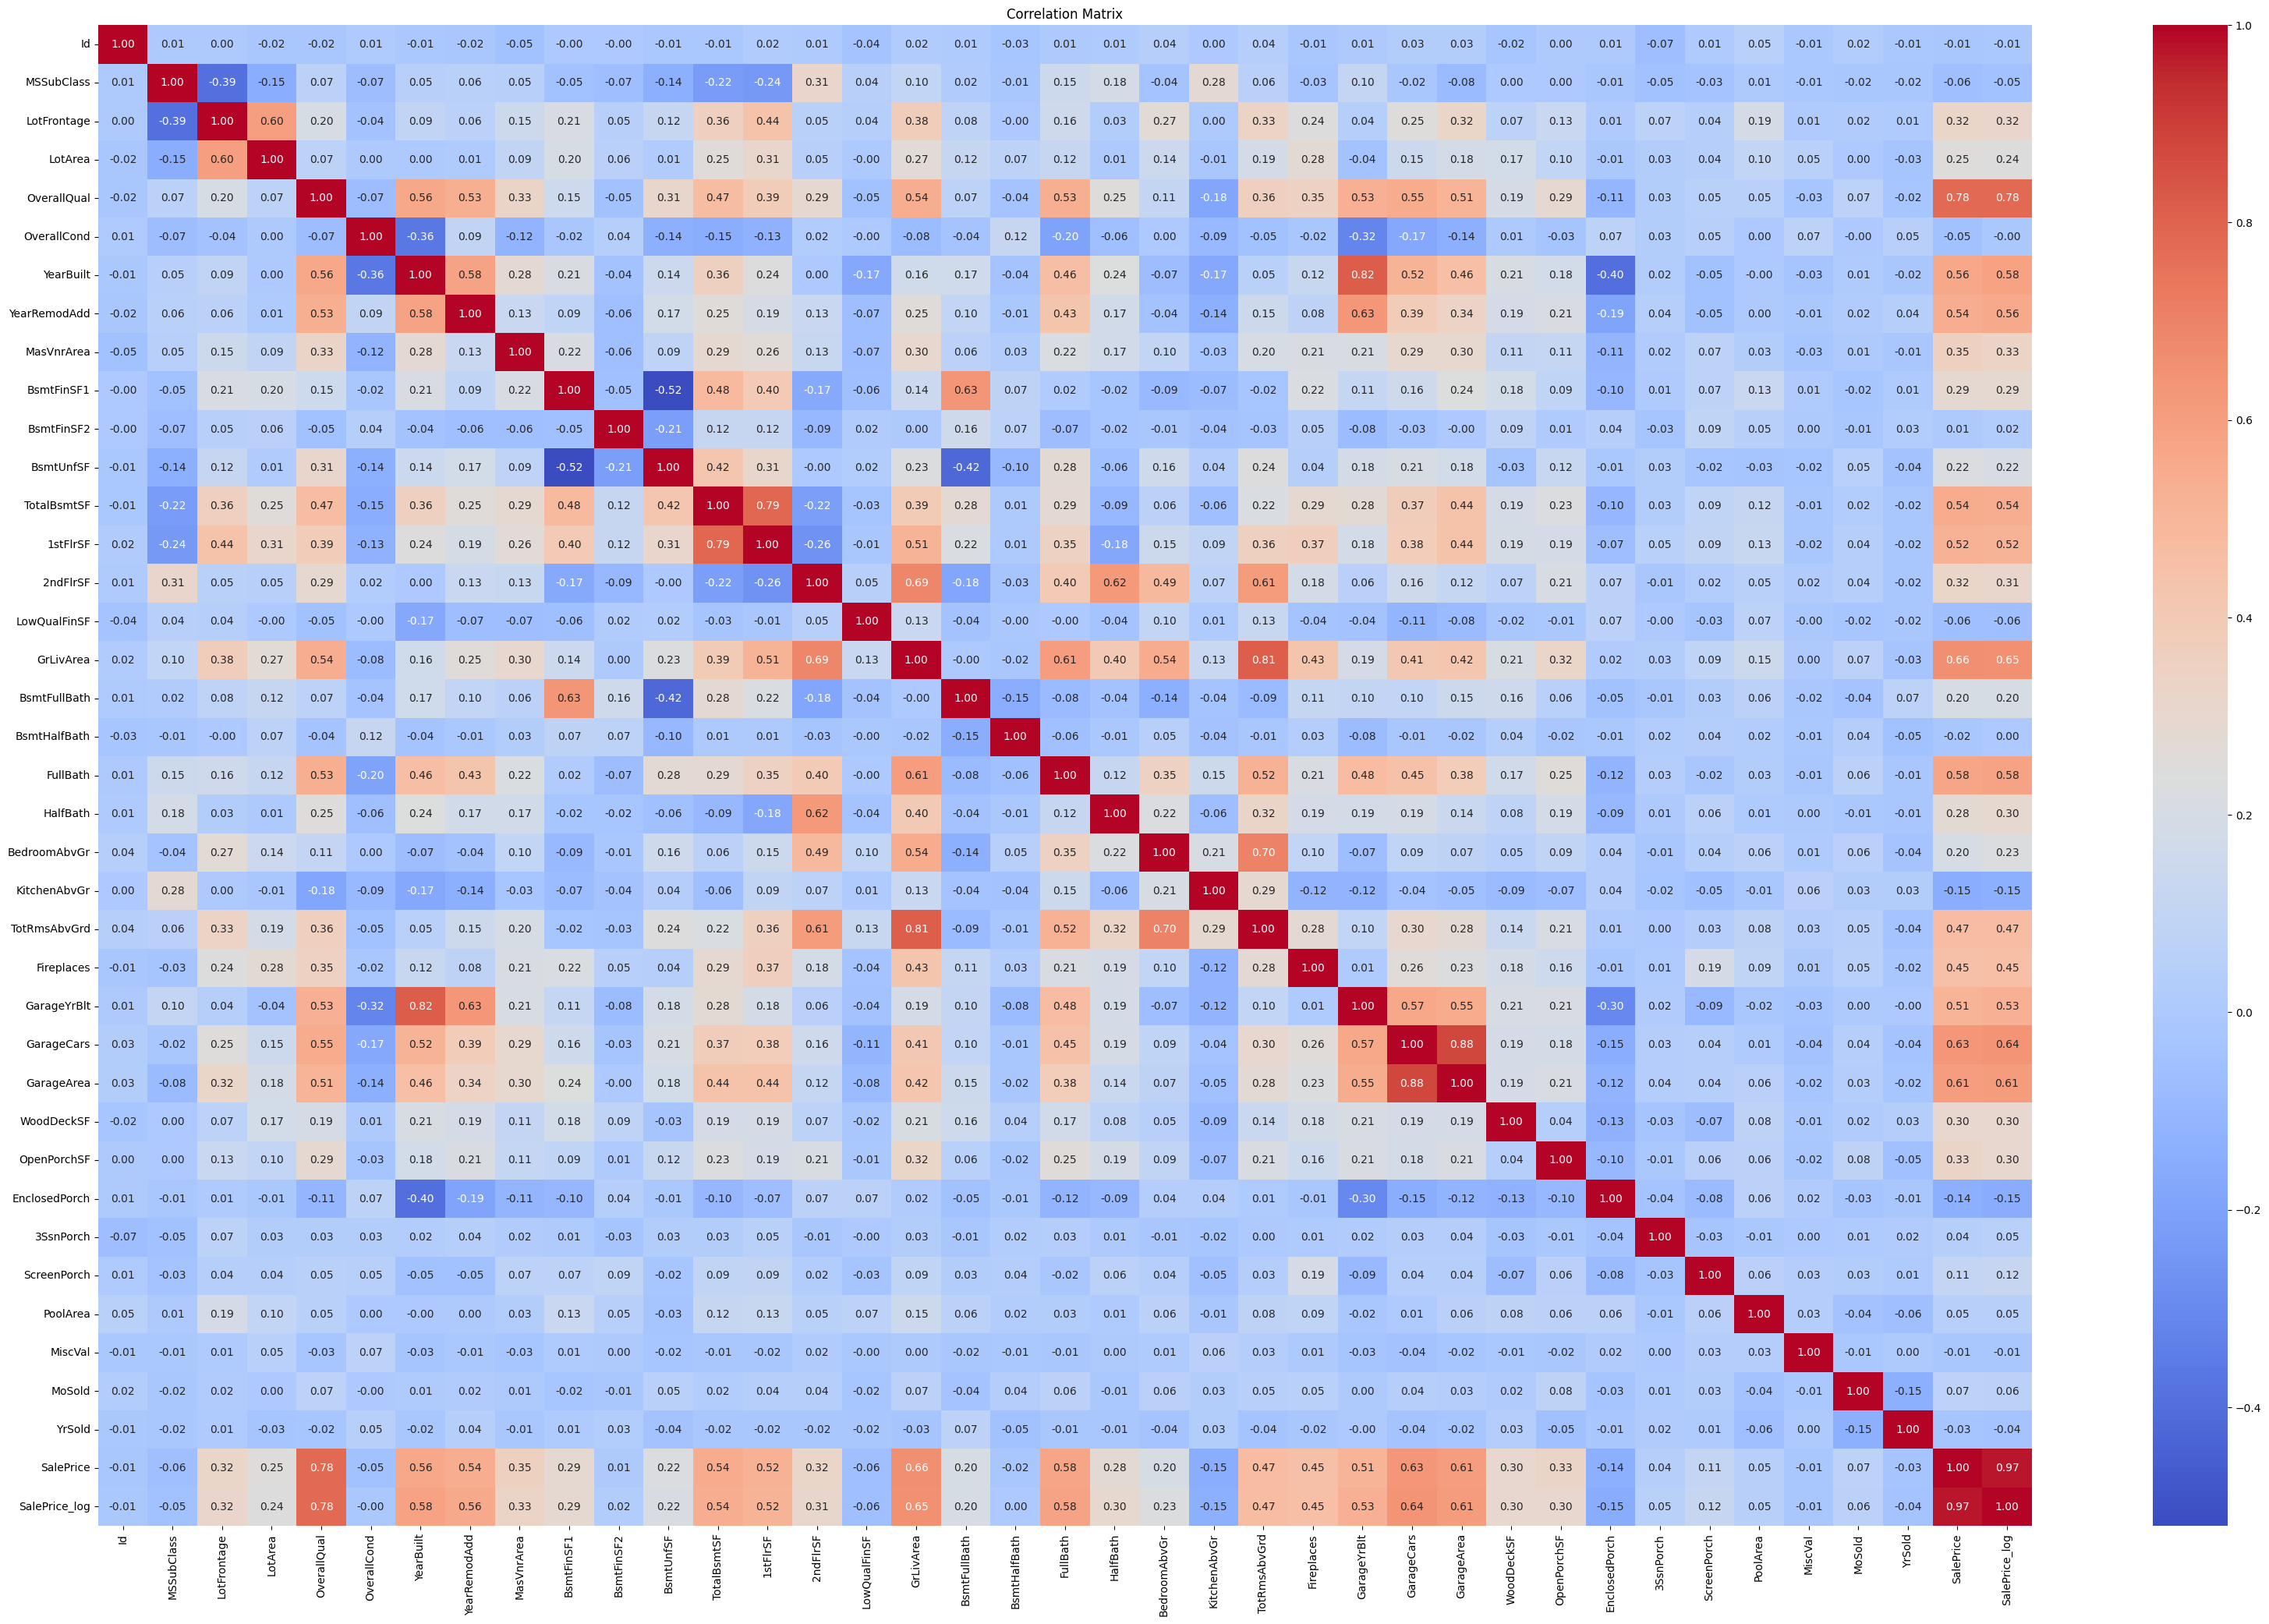

In [103]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(40,25))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [104]:
corr_with_target = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

corr_with_target.head(10)

SalePrice        1.000000
SalePrice_log    0.970421
OverallQual      0.784294
GrLivArea        0.661325
GarageCars       0.628013
GarageArea       0.607230
FullBath         0.577369
YearBuilt        0.564558
TotalBsmtSF      0.543508
YearRemodAdd     0.541161
Name: SalePrice, dtype: float64

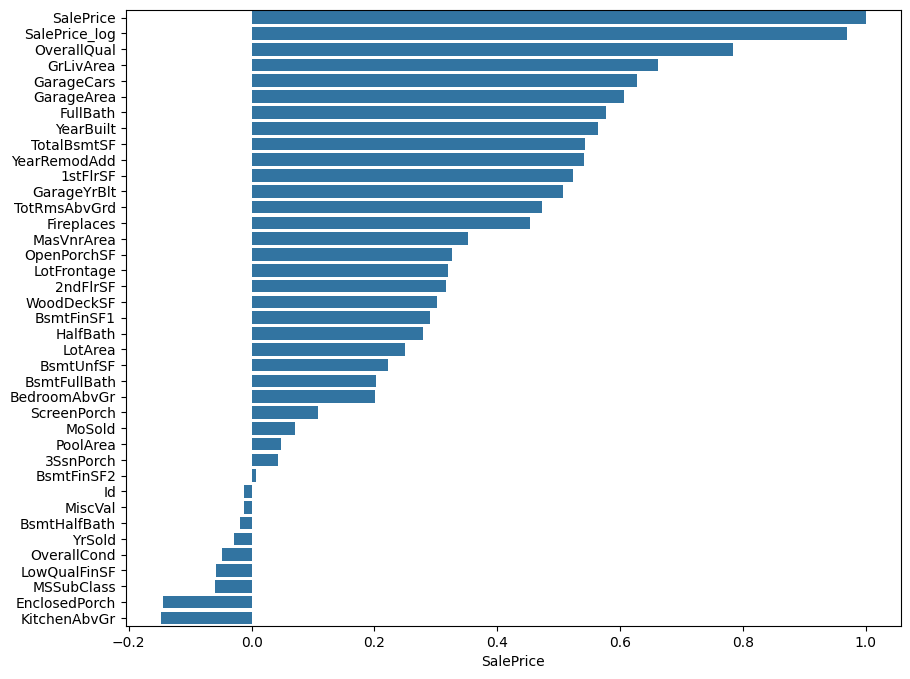

In [105]:
plt.figure(figsize=(10,8))
sns.barplot(corr_with_target,orient = 'y' ) ## orient: Literal['v', 'h', 'x', 'y']
plt.show()

/tmp/ipykernel_16365/2002395499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='viridis')


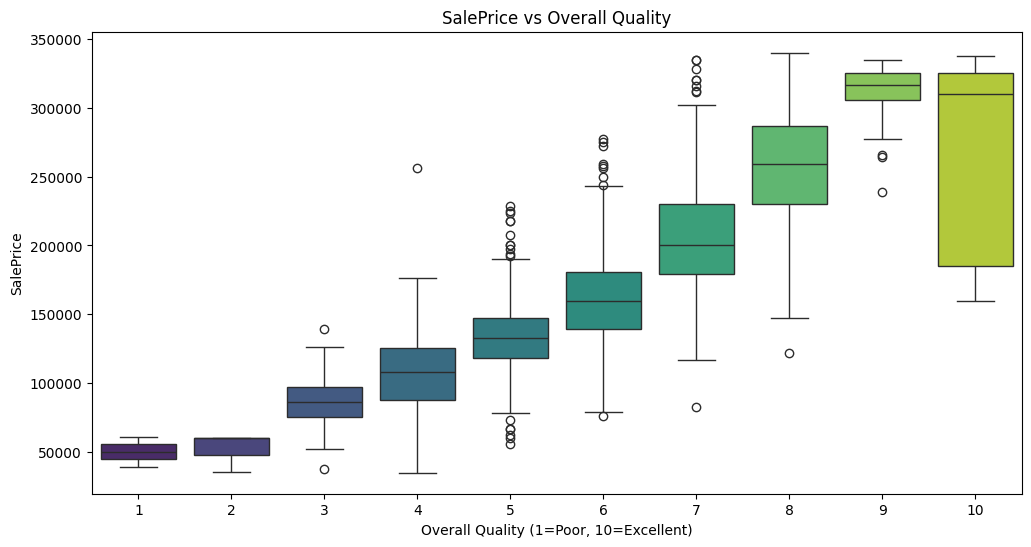

In [106]:
plt.figure(figsize=(12,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='viridis')
plt.title('SalePrice vs Overall Quality')
plt.xlabel('Overall Quality (1=Poor, 10=Excellent)')
plt.ylabel('SalePrice')
plt.show()

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

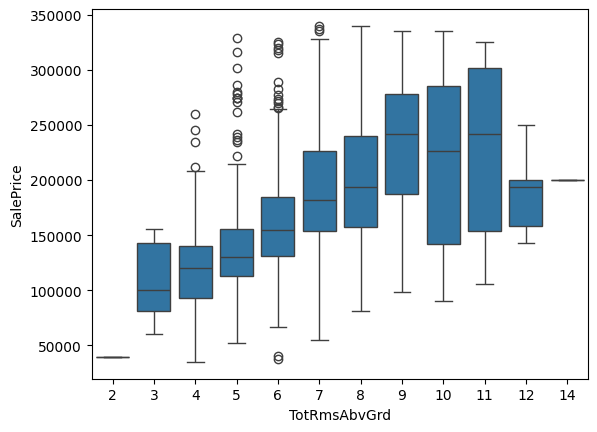

In [107]:
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=df)

In [ ]:
df.Neighborhood.value_counts()


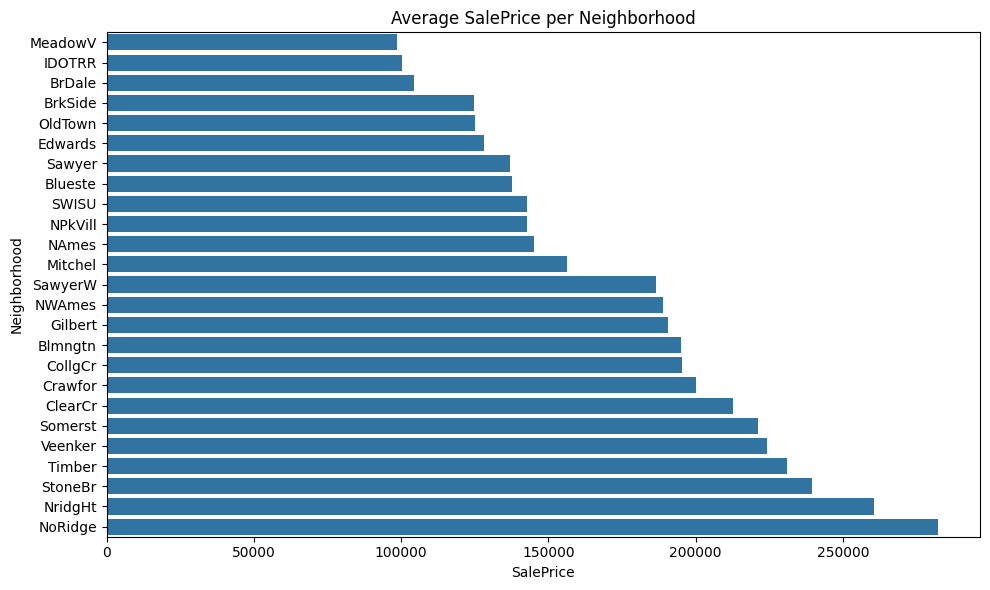

In [109]:
avg_price = df.groupby("Neighborhood")["SalePrice"].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(avg_price,orient = 'h')
plt.title("Average SalePrice per Neighborhood")
plt.tight_layout()
plt.show()

In [110]:
avg_price = df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False)

top5 = avg_price.head(5)
bottom5 = avg_price.tail(5)

summary_table = pd.concat([top5, bottom5], axis=0).to_frame("AvgPrice")
summary_table

,AvgPrice
Neighborhood,
NoRidge,282386.933333
NridgHt,260396.520000
StoneBr,239312.500000
Timber,230914.371429
Veenker,224150.000000
OldTown,125129.098214
BrkSide,124834.051724
BrDale,104493.750000
IDOTRR,100123.783784


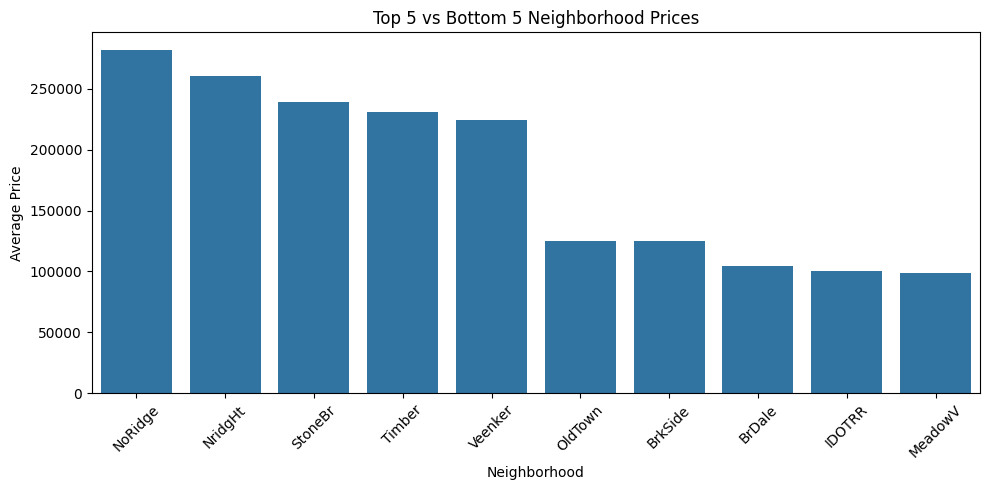

In [111]:
combined = pd.concat([top5, bottom5])

plt.figure(figsize=(10,5))
sns.barplot(combined)
plt.title("Top 5 vs Bottom 5 Neighborhood Prices")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

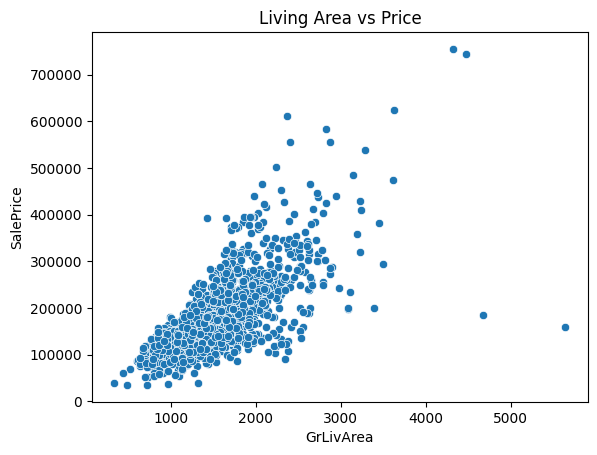

In [113]:
sns.scatterplot(x=train["GrLivArea"], y=train["SalePrice"])
plt.title("Living Area vs Price")
plt.show()

<Axes: xlabel='Foundation', ylabel='SalePrice'>

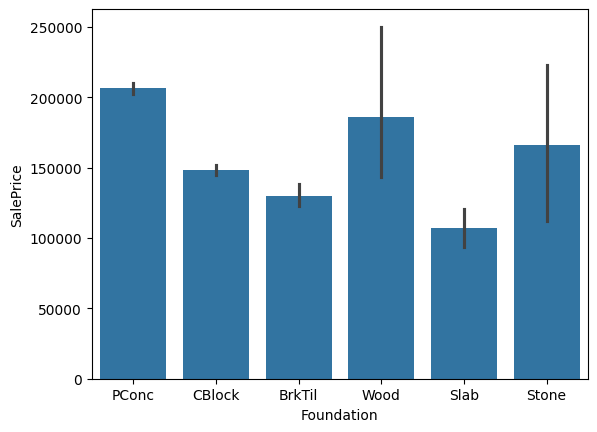

In [114]:
sns.barplot(data=df,x='Foundation',y='SalePrice')


## Target Variable Insight (SalePrice)

    SalePrice right-skewed

## Usually top correlated features:

    OverallQual (Overall material & finish quality)

    GrLivArea (Above ground living area)

    GarageCars

    GarageArea

    TotalBsmtSF

    1stFlrSF

    YearBuilt

## Common missing columns:

    Alley

    PoolQC

    Fence

    FireplaceQu

    Common outliers:

    Very large GrLivArea but low SalePrice

    Extremely old houses priced unusually high

## Categorical Feature

    Neighborhood

    ExterQual

    KitchenQual

    BsmtQual

## Multicollinearity

    GarageArea vs GarageCars

    TotalBsmtSF vs 1stFlrSF

In [115]:
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split

def split_features(df, cat_unique_threshold=20):
    num_cols = df.select_dtypes(include=["number"]).columns.tolist()
    cat_cols = df.select_dtypes(include=["object","category","bool"]).columns.tolist()

    for col in num_cols.copy():
        if df[col].nunique() <= cat_unique_threshold:
            cat_cols.append(col)
            num_cols.remove(col)
    return num_cols, cat_cols


df["SalePrice"] = np.log1p(df["SalePrice"])

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Re-evaluate numerical and categorical features based on X_train
numerical_features, categorical_features = split_features(X_train)

# Numerical pipeline
num_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", cat_pipeline, categorical_features)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

RMSE: 0.007991445357512948
R2 Score: 0.9994478862728975


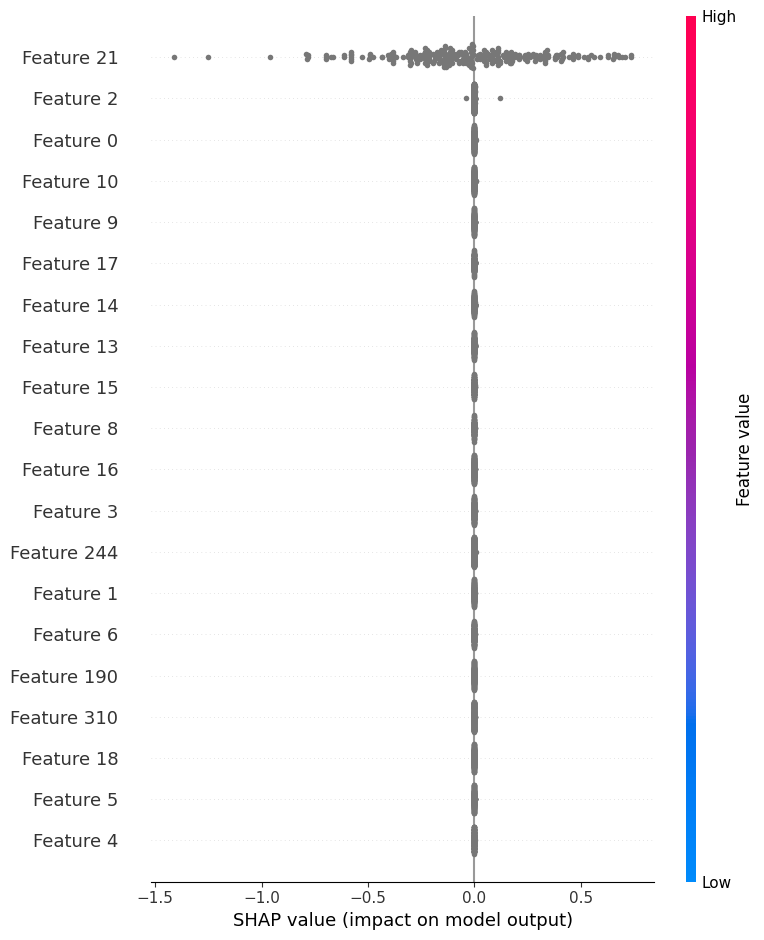

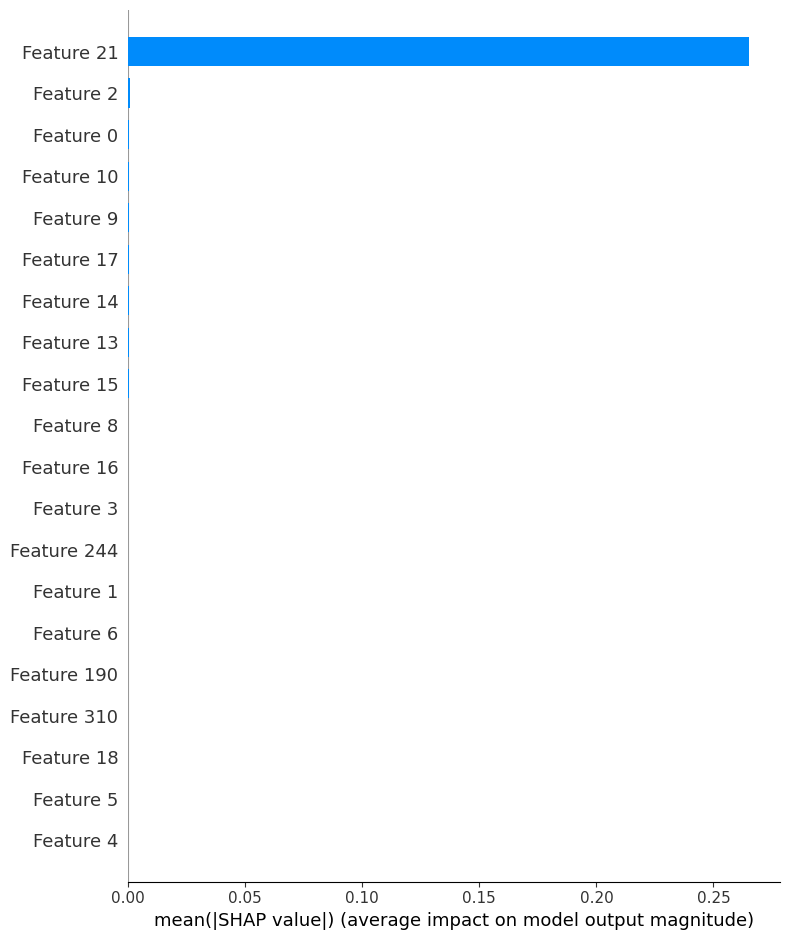

In [120]:
import shap
import xgboost
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error

# train model
model = xgboost.XGBRegressor()
model.fit(X_train_processed, y_train)
preds = model.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE:", rmse)
r2 = r2_score(y_test, preds)
print("R2 Score:", r2)

# SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_processed)

# summary plot
shap.summary_plot(shap_values, X_test_processed)

# feature importance
shap.summary_plot(shap_values, X_test_processed, plot_type="bar")

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [7]:
list(set(train.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [8]:
train_num = train.select_dtypes(include = ['float64', 'int64'])
train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

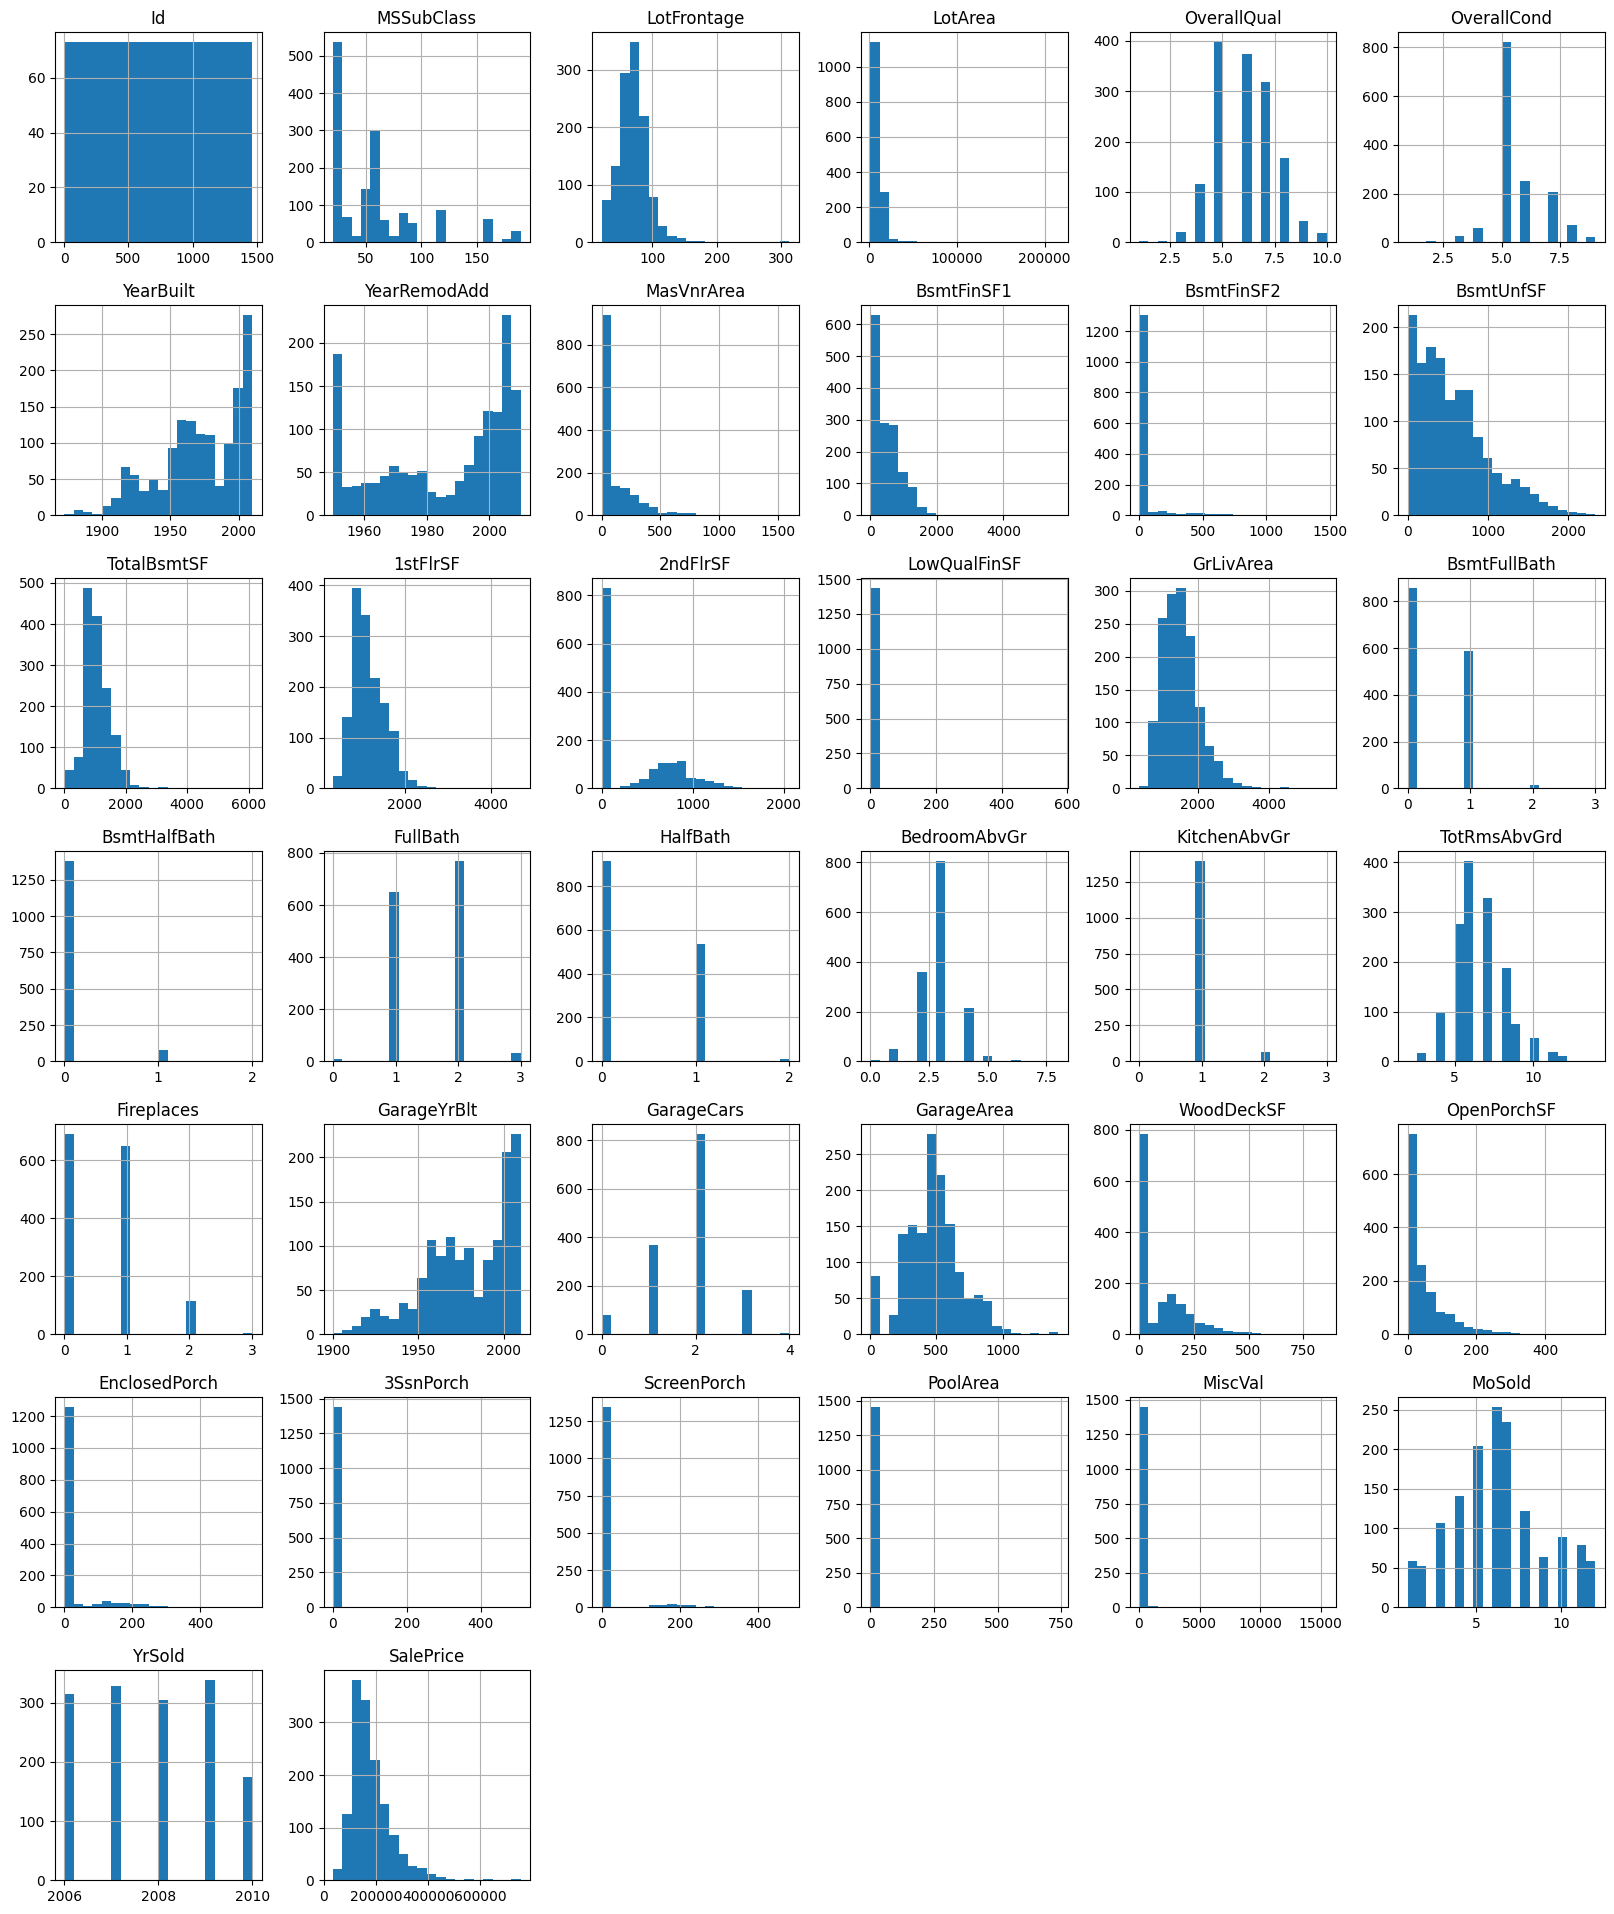

In [9]:
train_num.hist(figsize=(20, 24), bins=20, xlabelsize=10, ylabelsize=10)

## https://www.tensorflow.org/decision_forests

In [ ]:
# # Install TF-DF
# !pip install tensorflow tensorflow_decision_forests

# # Load TF-DF
# import tensorflow_decision_forests as tfdf
# import pandas as pd

# # Load a dataset in a Pandas dataframe.
# train_df = pd.read_csv("project/train.csv")
# test_df = pd.read_csv("project/test.csv")

label = 'SalePrice'

# Keep train/predict feature schemas consistent: do not use Id as a model feature.
train_model_df = train.drop(columns=['Id']).copy() if 'Id' in train.columns else train.copy()
test_features = test.drop(columns=['Id']).copy() if 'Id' in test.columns else test.copy()

# Convert the dataset into TensorFlow datasets.
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_model_df, label=label, task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_features, task=tfdf.keras.Task.REGRESSION)

tuner = tfdf.tuner.RandomSearch(num_trials=20)
tuner.choice("max_depth", list(range(4, 16)))
tuner.choice("num_trees", [200, 500, 800])

# Train a Random Forest model.
model = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION,
    max_depth=10,
    num_trees=400,
    min_examples=10,
    # tuner=tuner,
    hyperparameter_template="benchmark_rank1", ## hyperparameter_template is a predefined set of hyperparameters created by TFDF authors.
    num_candidate_attributes_ratio=0.7, ## Feature sampling ratio।
    compute_oob_performances=True, ## Out-of-Bag evaluation। -> Bootstrap এ যে data ব্যবহার হয়নি,
    random_seed=42
)
model.fit(train_ds)

# Summary of the model structure.
model.summary()


Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpd42y1qab as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.450790. Found 1460 examples.
Training model...


I0000 00:00:1771477485.614974   16365 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1771477485.615062   16365 kernel.cc:783] Collect training examples
I0000 00:00:1771477485.615089   16365 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1771477485.615792   16365 kernel.cc:401] Number of batches: 2
I0000 00:00:1771477485.615822   16365 kernel.cc:402] Number of examples: 1460
I0000 00:00:1771477485.621006   16365 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1771477485.621121   16365 data_spec_inference.cc:354] 1 item(s) have been prun

Model trained in 0:00:16.821426
Compiling model...


I0000 00:00:1771477502.364704   16365 decision_forest.cc:808] Model loaded with 1000 root(s), 189854 node(s), and 74 input feature(s).
I0000 00:00:1771477502.364753   16365 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2026-02-19 11:05:02.364785: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.
Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (79):
	1stFlrSF
	2ndFlrSF
	3SsnPorch
	Alley
	BedroomAbvGr
	BldgType
	BsmtCond
	BsmtExposure
	BsmtFinSF1
	BsmtFinSF2
	BsmtFinType1
	BsmtFinType2
	BsmtFullBath
	BsmtHalfBath
	BsmtQual
	BsmtUnfSF
	CentralAir
	Condition1
	Condition2
	Electrical
	EnclosedPorch
	ExterCond
	ExterQual
	Exterior1st
	Exterior2nd
	Fence
	FireplaceQu
	Fireplaces
	Foundation
	FullBath
	Functional
	GarageArea
	GarageCars
	GarageCond
	GarageFinish
	GarageQual
	GarageType
	GarageYrBlt
	GrLivArea
	HalfBath
	Heating
	HeatingQC
	HouseStyle
	KitchenAbvGr
	KitchenQual
	LandContour
	LandSlope
	LotArea
	LotConfig
	LotFr

In [38]:
model.compile(metrics=["mse"]) 

In [27]:
# Compute metrics without model.compile/evaluate (avoids TFDF+Keras metric compatibility issues).
import numpy as np

train_pred = model.predict(train_ds).squeeze()
y_train = train[label].to_numpy()

rmse = np.sqrt(np.mean((y_train - train_pred) ** 2))
r2 = 1 - np.sum((y_train - train_pred) ** 2) / np.sum((y_train - y_train.mean()) ** 2)

print("Train RMSE:", rmse)
print("Train R2:", r2)


# Export the model to a SavedModel.
# model.save("tfdf-model")

2/2 [==============================] - 1s 351ms/step
Train RMSE: 20067.699503592492
Train R2: 0.9361461767876619


In [37]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)


In [33]:
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1460, accuracy=None, loss=None, rmse=29225.77116815983, ndcg=None, aucs=None, auuc=None, qini=None)

In [39]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


In [40]:
inspector.variable_importances()["NUM_AS_ROOT"]


[("OverallQual" (1; #62), 561.0),
 ("ExterQual" (4; #22), 189.0),
 ("GarageCars" (1; #32), 131.0),
 ("GrLivArea" (1; #38), 96.0),
 ("TotalBsmtSF" (1; #73), 61.0),
 ("GarageArea" (1; #31), 55.0),
 ("YearBuilt" (1; #76), 53.0),
 ("GarageYrBlt" (1; #37), 44.0),
 ("1stFlrSF" (1; #0), 42.0),
 ("LotArea" (1; #47), 38.0),
 ("PoolArea" (1; #64), 32.0),
 ("YearRemodAdd" (1; #77), 32.0),
 ("FullBath" (1; #29), 30.0),
 ("Fireplaces" (1; #27), 29.0),
 ("MiscVal" (1; #57), 29.0),
 ("TotRmsAbvGrd" (1; #72), 27.0),
 ("3SsnPorch" (1; #2), 26.0),
 ("BsmtFinSF1" (1; #8), 26.0),
 ("BsmtFinSF2" (1; #9), 24.0),
 ("LowQualFinSF" (1; #51), 24.0),
 ("KitchenAbvGr" (1; #43), 19.0),
 ("MasVnrArea" (1; #54), 16.0),
 ("BedroomAbvGr" (1; #4), 15.0),
 ("LotFrontage" (1; #49), 15.0),
 ("BsmtHalfBath" (1; #13), 14.0),
 ("EnclosedPorch" (1; #20), 13.0),
 ("ScreenPorch" (1; #70), 13.0),
 ("OverallCond" (1; #61), 11.0),
 ("BsmtQual" (4; #14), 8.0),
 ("KitchenQual" (4; #44), 8.0),
 ("OpenPorchSF" (1; #60), 7.0),
 ("WoodD

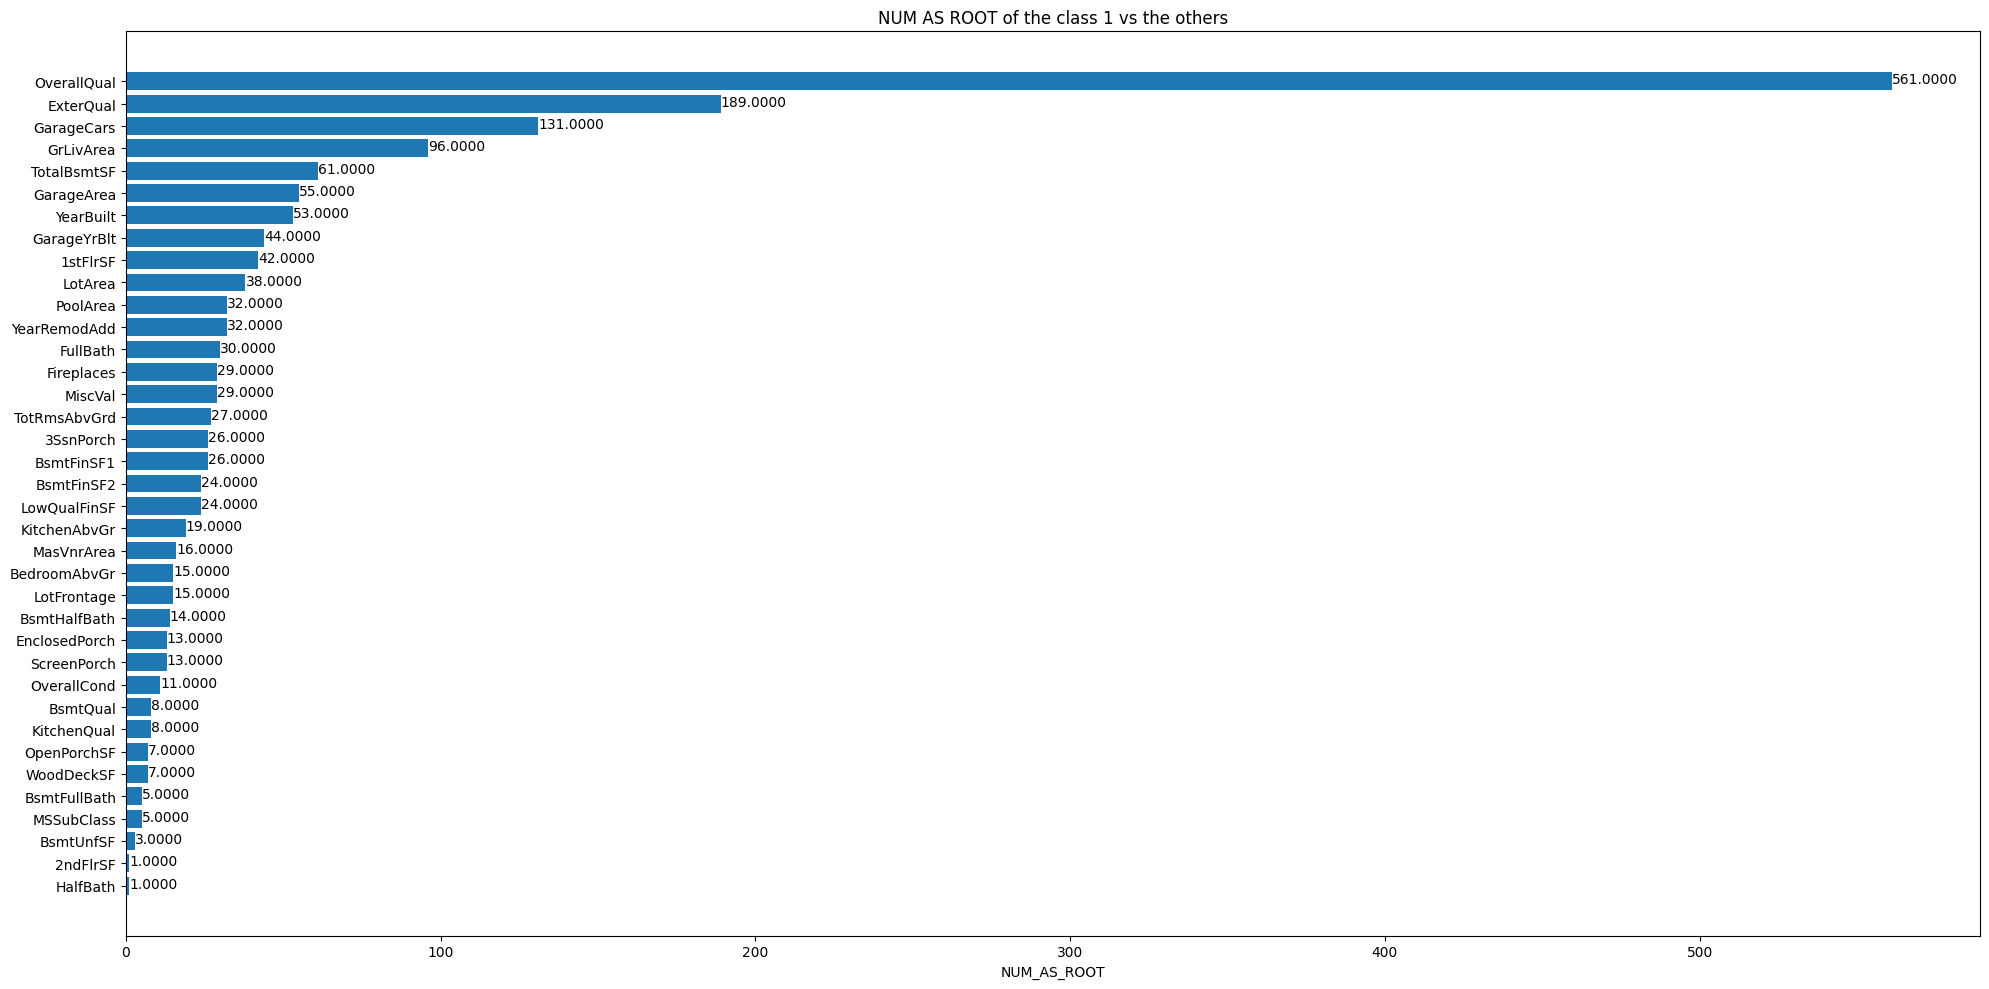

In [43]:
plt.figure(figsize=(20, 10))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()


# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [44]:
evaluation = model.evaluate(x=test_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 1s 232ms/step - loss: 0.0000e+00 - mse: 0.0000e+00
loss: 0.0000
mse: 0.0000


In [45]:
# Robust submission prep: works whether `test` still has Id or not.
if 'Id' in test.columns:
    ids = test['Id'].copy()
    test_features = test.drop(columns=['Id']).copy()
else:
    ids = sample['Id'].copy()
    test_features = test.copy()

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_features,
    task=tfdf.keras.Task.REGRESSION
)

preds = model.predict(test_ds).squeeze()
output = pd.DataFrame({'Id': ids, 'SalePrice': preds})

output.head()


2/2 [==============================] - 1s 291ms/step


,Id,SalePrice
0,1461,126813.648438
1,1462,152428.218750
2,1463,178067.000000
3,1464,183999.406250
4,1465,198473.046875


In [30]:
sample['SalePrice'] = model.predict(test_ds)
sample.to_csv('submission.csv', index=False)
sample.head()

2/2 [==============================] - 1s 299ms/step


,Id,SalePrice
0,1461,126813.648438
1,1462,152428.218750
2,1463,178067.000000
3,1464,183999.406250
4,1465,198473.046875


In [48]:
from sklearn.model_selection import train_test_split
import numpy as np

# Holdout validation split (this is how to estimate test-like RMSE/R2 locally).
train_part, valid_part = train_test_split(train, test_size=0.2, random_state=42)

train_part_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    train_part, label=label, task=tfdf.keras.Task.REGRESSION
)
valid_part_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    valid_part, label=label, task=tfdf.keras.Task.REGRESSION
)

val_model = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.REGRESSION,
    max_depth=10,
    num_trees=600,
    min_examples=10,
    hyperparameter_template="benchmark_rank1",
    num_candidate_attributes_ratio=0.7,
    compute_oob_performances=True,
    random_seed=42,
)
val_model.fit(train_part_ds)

valid_pred = val_model.predict(valid_part_ds).squeeze()
y_valid = valid_part[label].to_numpy()

val_rmse = np.sqrt(np.mean((y_valid - valid_pred) ** 2))
val_r2 = 1 - np.sum((y_valid - valid_pred) ** 2) / np.sum((y_valid - y_valid.mean()) ** 2)

print("Validation RMSE:", val_rmse)
print("Validation R2:", val_r2)

# Keep Kaggle test predictions separate (no labels available there).
test_pred = model.predict(test_ds).squeeze()
print("Test predictions shape:", test_pred.shape)


Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpe6_ktq8i as temporary training directory
Reading training dataset...


Training dataset read in 0:00:01.733648. Found 1168 examples.
Training model...


I0000 00:00:1771478165.036951   16365 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1771478165.037009   16365 kernel.cc:783] Collect training examples
I0000 00:00:1771478165.037021   16365 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1771478165.037410   16365 kernel.cc:401] Number of batches: 2
I0000 00:00:1771478165.037420   16365 kernel.cc:402] Number of examples: 1168
I0000 00:00:1771478165.040357   16365 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1771478165.040406   16365 data_spec_inference.cc:354] 1 item(s) have been prun

Model trained in 0:00:09.011493
Compiling model...


I0000 00:00:1771478174.011352   16365 decision_forest.cc:808] Model loaded with 600 root(s), 96036 node(s), and 74 input feature(s).
I0000 00:00:1771478174.011398   16365 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2026-02-19 11:16:14.011435: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


1/1 [==============================] - 0s 328ms/step
Validation RMSE: 31127.731358754496
Validation R2: 0.8736773856325835
2/2 [==============================] - 1s 188ms/step
Test predictions shape: (1459,)


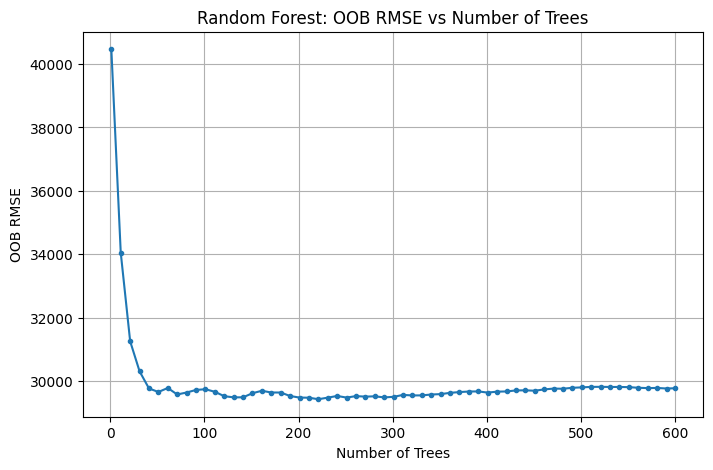

In [50]:
# ========================
# Find Optimal Number of Trees
# ========================
logs = model.make_inspector().training_logs()
logs = val_model.make_inspector().training_logs()

num_trees = [log.num_trees for log in logs]
oob_rmse  = [log.evaluation.rmse for log in logs]

plt.figure(figsize=(8,5))
plt.plot(num_trees, oob_rmse, marker='.')
plt.xlabel("Number of Trees")
plt.ylabel("OOB RMSE")
plt.title("Random Forest: OOB RMSE vs Number of Trees")
plt.grid(True)
plt.show()

## https://ydf.readthedocs.io/en/latest/

In [ ]:
# ! pip install ydf -U
import ydf  # Yggdrasil Decision Forests
import pandas as pd 

In [52]:
# Download and load the dataset into Pandas DataFrames
train = pd.read_csv('kaggle_house-train.csv')
test = pd.read_csv('kaggle-house-test.csv')
sample = pd.read_csv('sample_submission.csv')

# Display the first 5 rows of the training data
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_part, valid_part = train_test_split(train, test_size=0.2, random_state=42)


In [62]:
model = ydf.GradientBoostedTreesLearner(label="SalePrice",task=ydf.Task.REGRESSION).train(train_part)

Feature Street is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Utilities is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature Condition2 is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Feature PoolQC is a CATEGORICAL feature with an empty dictionary. The feature will not be useful during model training.
Feature MiscFeature is a CATEGORICAL feature whose dictionary has a single element. The feature will not be useful during model training.
Train model on 1168 examples
Model trained in 0:00:01.575258


In [63]:
model.describe()

In [64]:
model.predict(test)

array([130281.82 , 159012.05 , 185122.17 , ..., 179735.11 , 117647.445,
       191898.69 ], dtype=float32)

In [65]:
evaluation = model.evaluate(valid_part)

print(evaluation)

RMSE: 25614.5
num examples: 292
num examples (weighted): 292



In [66]:
evaluation = model.evaluate(valid_part)

# Query individual evaluation metrics
print(f"Test accuracy: {evaluation.rmse}")

# Show the full evaluation report
print("Full evaluation report:")
evaluation

Test accuracy: 25614.503000158755
Full evaluation report:


Evaluation()

In [69]:
# Analyse a model (e.g. partial dependence plot, variable importance)
# model.analyze(valid_part)

# Benchmark the inference speed of a model
model.benchmark(valid_part)


Single-thread inference time per example: 22.134 us (microseconds)
Details: 143664 predictions in 0.000 seconds

Multi-thread inference time per example: 3.712 us (microseconds)
Details: 244404 predictions in 0.000 seconds using 8 threads

* Measured with the C++ serving API. See model.to_cpp().